In [3]:
import networkx as nx
import sys
sys.path.append(r"C:\Users\egbonsisi\ControllerPlacementCodes\Skoltech-PhD-Thesis\_codes\SIR\Influential-nodes-identification-in-complex-networks-via-information-entropy")
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

## load data

In [4]:
data_file = 'topo' # 'HepPh'
G = clean_data(data_file)
print(nx.number_of_nodes(G), nx.number_of_edges(G))


34 42


In [5]:
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)

# set edge attributes
set_edge_attr(G, edge_geo_data_combined)


## get initial node sets

In [6]:
max_ = 1
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)

degreerank = degree(G, max_topk)
print("degreerank ", degreerank)
print('done!')
print(" ")
degreerank_non = degree_non(G, max_topk)
print("degreerank_non ", degreerank_non)
print('done!')
print(" ")

# vote = voterank(G, max_topk)
# print('done!')
# vote_non = voterank_non(G, max_topk)
# print('done!')

kshell_rank = kshell(G, max_topk)
print("kshell_rank: ", kshell_rank)
print('done!')
print(" ")
kshell_rank_non = kshell_non(G, max_topk)
print("kshell_rank_non: ", kshell_rank_non)
print('done!')
print(" ")

newmethod_rank = EnRenewRank(G, max_topk, 2)
print("newmethod_rank: ", newmethod_rank)
print('done!')
print(" ")



34
degreerank  [('2', ' '), ('5', ' '), ('12', ' '), ('6', ' '), ('7', ' '), ('8', ' '), ('14', ' '), ('11', ' '), ('16', ' '), ('24', ' '), ('28', ' '), ('19', ' '), ('29', ' '), ('21', ' '), ('27', ' '), ('3', ' '), ('4', ' '), ('15', ' '), ('10', ' '), ('9', ' '), ('13', ' '), ('22', ' '), ('32', ' '), ('17', ' '), ('18', ' '), ('20', ' '), ('23', ' '), ('31', ' '), ('25', ' '), ('26', ' '), ('33', ' '), ('34', ' '), ('1', ' '), ('30', ' ')]
done!
 
degreerank_non  [('2', ' '), ('12', ' '), ('6', ' '), ('8', ' '), ('16', ' '), ('28', ' '), ('19', ' '), ('21', ' '), ('10', ' '), ('23', ' '), ('25', ' '), ('33', ' '), ('5', ' '), ('7', ' '), ('14', ' '), ('11', ' '), ('24', ' '), ('29', ' '), ('27', ' '), ('3', ' '), ('4', ' '), ('15', ' '), ('9', ' '), ('13', ' '), ('22', ' '), ('32', ' '), ('17', ' '), ('18', ' '), ('20', ' '), ('31', ' '), ('26', ' '), ('34', ' '), ('1', ' '), ('30', ' ')]
done!
 
kshell_rank:  [('2', ' '), ('5', ' '), ('12', ' '), ('6', ' '), ('7', ' '), ('8', ' '

## Different initial infection set sizes

In [7]:
# r is the infection rates
r = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9] #[0.0015, 0.003, 0.0045, 0.006, 0.0075, 0.009]
# r = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]
topk_list = []
for k in r:
    topk = round(nx.number_of_nodes(G) * k)
    print(k, topk)
    topk_list.append(topk)
    
infect_prob = compute_probability(G) * 1.5
print(infect_prob)
atio = 1.5
cover_prob = infect_prob / atio
avg = 100
max_iter = 200000

degreerank_result = []
degreerank_non_result = []
vote_result = []
vote_non_result = []
newmethod_result = []
newmethod_non_result = []
kshell_result = []
kshell_non_result = []

for k in tqdm(topk_list):
    topk = k
    degreerank_result.append(get_sir_result(G, degreerank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    degreerank_non_result.append(get_sir_result(G, degreerank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_result.append(get_sir_result(G, vote, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_non_result.append(get_sir_result(G, vote_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_result.append(get_sir_result(G, kshell_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_non_result.append(get_sir_result(G, kshell_rank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    newmethod_result.append(get_sir_result(G, newmethod_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))

  0%|          | 0/6 [00:00<?, ?it/s]

0.15 5
0.3 10
0.45 15
0.6 20
0.75 26
0.9 31
0.8873239436619718


100%|██████████| 6/6 [00:04<00:00,  1.28it/s]


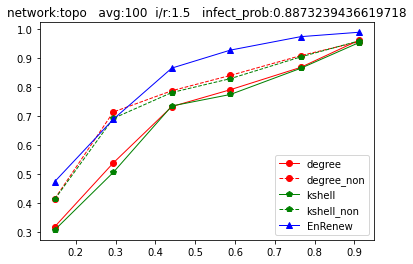

In [8]:
%matplotlib inline
plt.title('network:{}   avg:{}  i/r:{}   infect_prob:{}'.format(data_file, avg, atio, infect_prob))
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degreerank_result, 'r-o', label='degree', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degreerank_non_result, 'r--o', label='degree_non', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), vote_result, 'y-s', label='vote', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), vote_non_result, 'y--s', label='vote_non', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_result, 'g-p', label='kshell', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_non_result, 'g--p', label='kshell_non', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_result, 'b-^', label='EnRenew', linewidth=1.0, )
plt.legend()
plt.show()